In [1]:
import cv2 
import numpy as np 

import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread("hd1.jpeg")

In [3]:
def fourier_transform_rgb(image):
    f_size = 25
    fft_images=[]
    fft_images_log = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        fft_images.append(rgb_fft)
        fft_images_log.append(np.log(abs(rgb_fft)))
    
    return fft_images, fft_images_log 

In [4]:
fft_images, fft_images_log = fourier_transform_rgb(img)

In [5]:
len(fft_images)

3

In [6]:
len(fft_images_log)

3

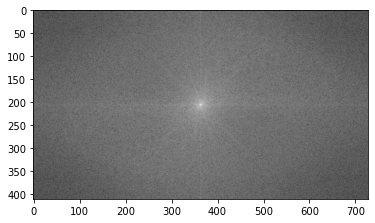

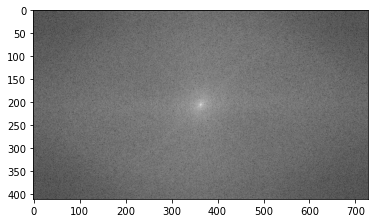

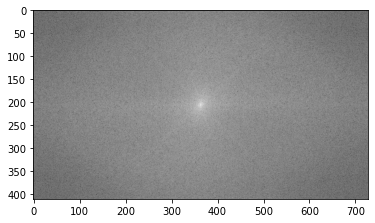

In [7]:
for c in fft_images_log:
    plt.imshow(c, cmap="gray")
    plt.show()

In [8]:
def normalize_image(img):
    img = img / np.max(img)
    return (img*255).astype('uint8')

In [9]:
temp = fft_images_log[0]

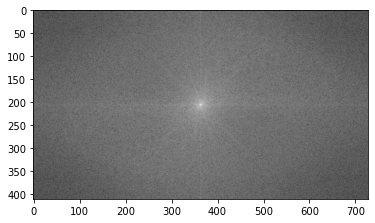

In [10]:
plt.imshow(temp,cmap="gray")

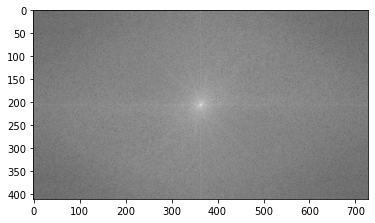

In [11]:
temp3 = cv2.merge((temp,temp,temp))
plt.imshow(normalize_image(temp3))

In [12]:
nor_temp = normalize_image(temp3)

In [13]:
nor_temp.dtype

dtype('uint8')

In [14]:
np.max(nor_temp)

255

In [15]:
temp.shape

(410, 728)

In [16]:
temp.dtype

dtype('float64')

In [17]:
np.max(temp)

17.659201316502124

In [18]:
np.max(fft_images[0])

(46697506+0j)

In [19]:
def write_background_images(images, names): 
    for image, name in zip(images, names):
        image3 = cv2.merge((image,image,image))
        image_3_nor = normalize_image(image3)
        plt.imshow(image_3_nor)
        plt.show()
        cv2.imwrite(name, image_3_nor)

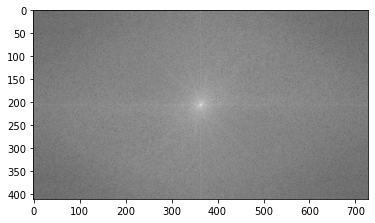

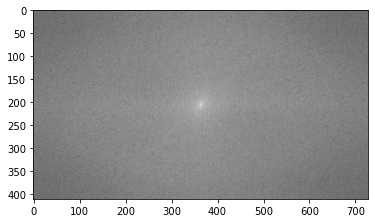

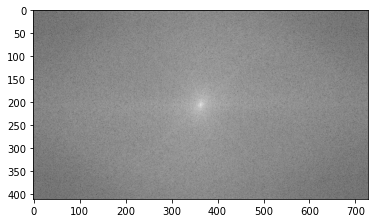

In [20]:
names = ["test_1.png","test_2.png","test_3.png"]

write_background_images(fft_images_log, names)

In [21]:
temp = fft_images[0]

print(temp.shape)
print(temp.dtype)

(410, 728)
complex128


In [22]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
      
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    return transformed_channels, final_image

In [23]:
img = cv2.imread("hd1.jpeg")

img.shape

(410, 728, 3)

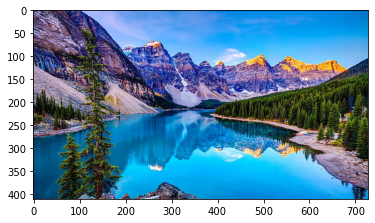

In [24]:
plt.imshow(img[:,:,::-1])

In [25]:
transformed_channels, final_image = fourier_transform_rgb(img)

In [26]:
temp = transformed_channels[0]

In [27]:
temp.shape

(410, 728)

In [28]:
np.max(temp)

259.5065205574792

In [29]:
np.min(temp)

0.013951432700244123

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


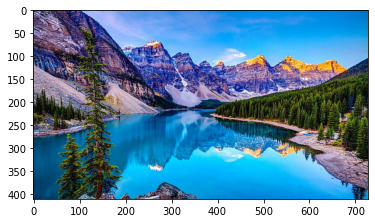

In [30]:
plt.imshow(final_image[:,:,::-1])

In [31]:
f_size = 25
transformed_channels = []

for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((img[:, :, i])))
    rgb_fft[:225, 235:237] = 1
    rgb_fft[-225:,235:237] = 1
    transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))


final_image = np.dstack([transformed_channels[0].astype(int), 
                         transformed_channels[1].astype(int), 
                         transformed_channels[2].astype(int)])

In [32]:
rgb_fft.shape

(410, 728)

In [33]:
rgb_fft.dtype

dtype('complex128')

In [34]:
temp2 = abs(temp)

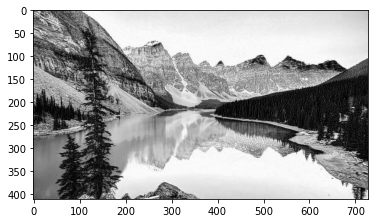

In [35]:
plt.imshow(temp2,cmap="gray")

In [36]:
np.max(temp2)

259.5065205574792

In [37]:
np.min(temp2)

0.013951432700244123

In [38]:
def normalize_image(img):
    img = img / np.max(img)
    return (img*255).astype('uint')

In [39]:
normalized = normalize_image(np.log(abs(rgb_fft)).astype(int))

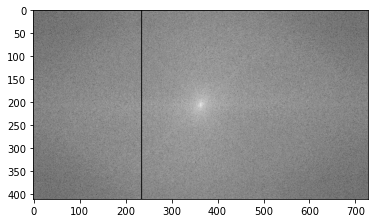

In [40]:
plt.imshow(normalized,cmap="gray")

In [41]:
np.max(normalized)

255

In [42]:
fft_images = []
for i in range(3):
            rgb_fft = np.fft.fftshift(np.fft.fft2((img[:, :, i])))
            # print(type(rgb_fft))
            fft_images.append(rgb_fft)

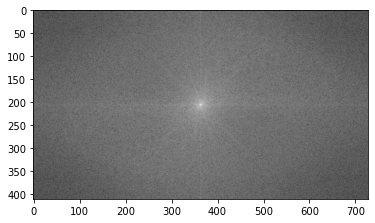

In [43]:
plt.imshow(np.log(abs(fft_images[0])), cmap="gray")

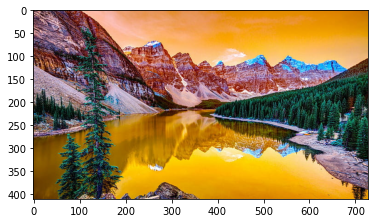

In [44]:
mask_image = cv2.imread("hd1.jpeg",-1)

plt.imshow(mask_image)

In [45]:
ret, thresh = cv2.threshold(mask_image, 125, 255, cv2.THRESH_BINARY)

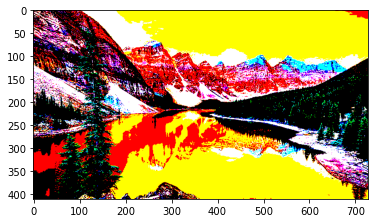

In [46]:
plt.imshow(thresh)

In [47]:
sample = cv2.imread("hd1.jpeg")
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

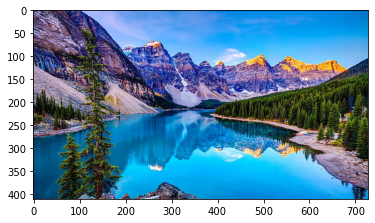

In [48]:
plt.imshow(sample)

In [49]:
thresh.shape

(410, 728, 3)

In [50]:
sample.shape

(410, 728, 3)

In [51]:
mask_array = ~thresh

In [52]:
np.min(mask_array)

0

In [53]:
mask_array.shape

(410, 728, 3)

In [54]:
alpha = mask_image[:,3]

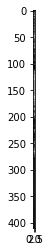

In [55]:
plt.imshow(alpha,cmap="gray")

In [56]:
mask_inv = cv2.bitwise_not(alpha)

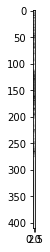

In [57]:
plt.imshow(mask_inv,cmap="gray")

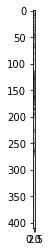

In [58]:
mask_inv3 = cv2.merge((mask_inv,mask_inv,mask_inv))
plt.imshow(mask_inv3)

In [59]:
alpha.shape

(410, 3)

In [60]:
alpha3 = cv2.merge((alpha,alpha,alpha))

In [61]:
def get_masked_image(image, canvas_image):
    mask = canvas_image[:,:,3]
    mask_inv = cv2.bitwise_not(mask)
    return cv2.bitwise_and(image, mask_inv3)

In [62]:
def get_masked_image(image, canvas_image):
    mask = canvas_image[:,:,3]
    mask_inv = cv2.bitwise_not(mask)
    mask_inv3 = cv2.merge((mask_inv,mask_inv,mask_inv))
    return cv2.bitwise_and(image, mask_inv3)

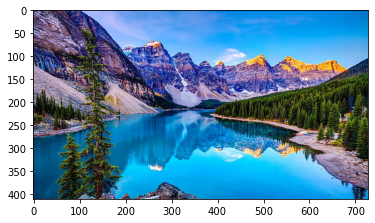

In [63]:
plt.imshow(sample)

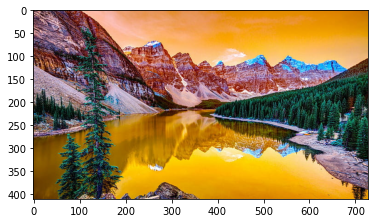

In [64]:
plt.imshow(mask_image)

In [65]:
names = ["canvas_image_r.png","canvas_image_g.png","canvas_image_b.png"]
canvas_images = []

for name in names: 
    canvas_images.append(cv2.imread(name,-1))

In [66]:
len(canvas_images)

3

In [67]:
temp = canvas_images[0]

In [68]:
type(temp)

numpy.ndarray

In [69]:
temp.shape

(410, 728, 4)

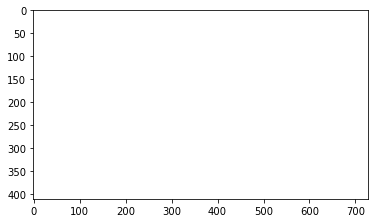

In [70]:
plt.imshow(temp)

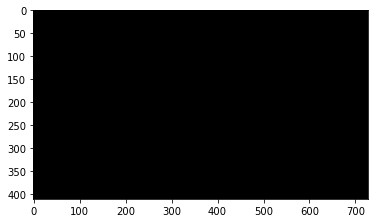

In [71]:
plt.imshow(temp[:,:,3],cmap="gray")

In [72]:
mask = temp[:,:,3]

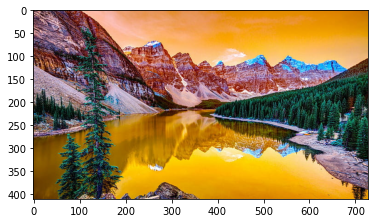

In [73]:
plt.imshow(img)

In [74]:
img_copy = np.copy(img)

In [75]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [76]:
_,thresh_mask = cv2.threshold(mask, 120,255, cv2.THRESH_BINARY)

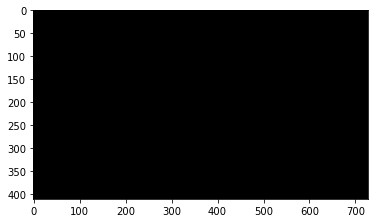

In [77]:
plt.imshow(thresh_mask,cmap="gray")

(array([     0.,      0.,      0.,      0.,      0., 298480.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

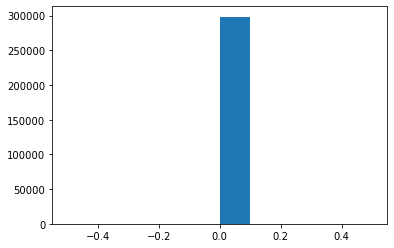

In [78]:
plt.hist(thresh_mask.ravel())

In [79]:
img_copy[thresh_mask] = 0

In [80]:
img_copy.shape

(410, 728, 3)

In [81]:
thresh_mask.shape

(410, 728)

In [82]:
thresh_mask_3 = cv2.merge((thresh_mask,thresh_mask,thresh_mask))

In [83]:
img_copy[thresh_mask_3] = 0

In [84]:
mask_bool =thresh_mask.astype('bool')

In [85]:
img_copy[mask_bool] = 0

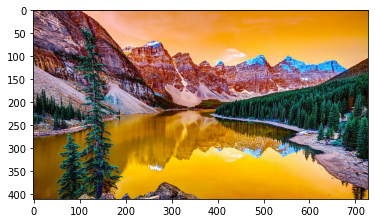

In [86]:
plt.imshow(img_copy)

In [87]:
def get_mask_from_canvas(canvas_images):
    list_mask = []
    for image in canvas_images:
        list_mask.append(image[:,:,3])
        
    return list_mask

In [88]:
def apply_mask(image, mask): 
    _, mask_thresh = cv2.threshold(mask, 120, 255, cv2.THRESH_BINARY)
    mask_bool = mask_thresh.astype('bool')
    image[mask_bool] = 1
    return image 

In [89]:
def apply_mask_all(images, list_mask): 
    final_result = []
    
    for (image,mask) in zip(images, list_mask):
        result = apply_mask(image,mask)
        final_result.append(final_result)
    return final_result

In [90]:
list_mask = get_mask_from_canvas(canvas_images)

In [91]:
temp2.shape

(410, 728)

In [92]:
final_result = apply_mask_all(fft_images, list_mask)

In [93]:
type(final_result)

list

In [ ]:
temp = final_result[0]

inv_fourier = abs(np.fft.ifft2(temp))

plt.imshow(inv_fourier)



In [ ]:
type(final_result)

In [ ]:
len(final_result)

In [ ]:
type(fft_images)

In [ ]:
def inverse_furiour(image):
    final_image = []
    for c in image:
        channel = abs(np.fft.ifft2(c))
#         plt.imshow(channel)
#         plt.show()
        final_image.append(channel)
    final_image_assebled = np.dstack([final_image[0].astype('int'),
                                     final_image[1].astype('int'),
                                     final_image[2].astype('int')])
    return final_image_assebled

In [ ]:
temp = inverse_furiour(fft_images)

In [ ]:
plt.imshow(temp)

In [ ]:
temp = apply_mask(fft_images[2], list_mask[2])

In [ ]:
temp

In [ ]:
inv_fourier = abs(np.fft.ifft2(temp))

In [ ]:
type(inv_fourier)

In [ ]:
inv_fourier.shape

In [ ]:
plt.imshow(inv_fourier)